In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
boy_groups = pd.read_csv('data/kpop_idols_boy_groups.csv')
girl_groups = pd.read_csv('data/kpop_idols_girl_groups.csv')
idols = pd.read_csv('data/kpop_idols.csv')
mv = pd.read_csv('data/kpop_mv_with_all_info.csv')

## 1. How’s the evolution of K-pop groups?

### • The total amount of new debut groups

In [3]:
boy_groups['gender'] = 'Male'
girl_groups['gender'] = 'Female'
kpop_groups = pd.concat([boy_groups, girl_groups], ignore_index=True)
kpop_groups['debut_year'] = kpop_groups.Debut.apply(lambda x: x[:4])

In [4]:
kpop_groups.head()

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active,gender,debut_year
0,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Male,2012
1,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes,Male,2017
2,1the9,NaN,원더나인,2019-02-09,MBK,9,9,NaN,Yes,Male,2019
3,24K,NaN,투포케이,2012-09-06,Choeun,8,6,24U,Yes,Male,2012
4,2AM,NaN,투에이엠,2008-06-21,"JYP, Big Hit",4,4,I Am,No,Male,2008


In [5]:
a = kpop_groups[['Name', 'gender', 'debut_year']].groupby(['debut_year', 'gender']).count().reset_index()
a.columns = ['debut_year', 'gender', 'count']
a.debut_year = a.debut_year.astype(int)

<AxesSubplot:xlabel='debut_year', ylabel='count'>

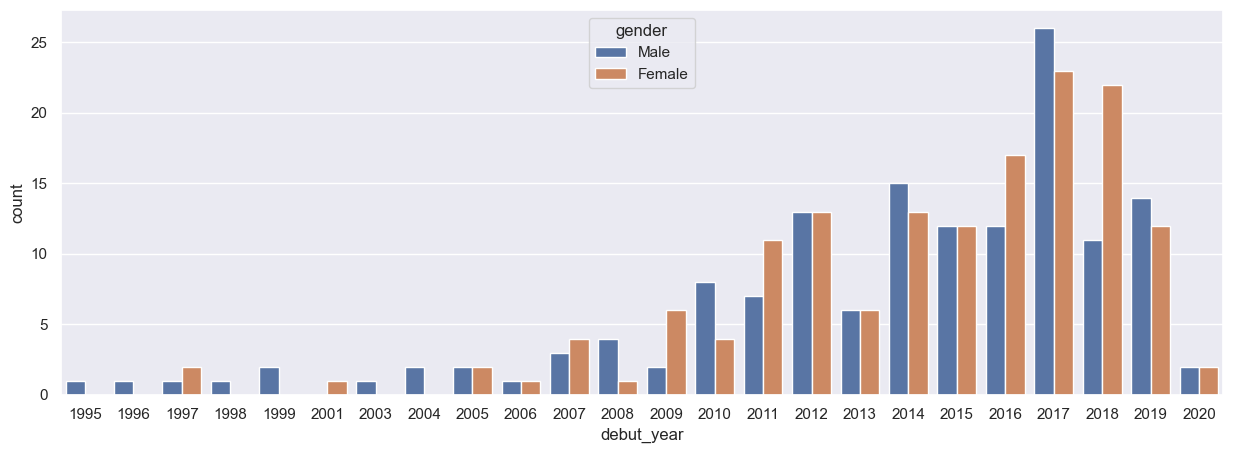

In [6]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.barplot(data=a, x='debut_year', y='count', hue='gender')

### • The average percentage of the non-Korean in a group

In [7]:
idols.head()

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F


In [8]:
tmp = idols.copy()
tmp['not_Korean'] = tmp['Country'].apply(lambda x: 0 if x == 'South Korea' else 1)
tmp = tmp[['not_Korean', 'Group']].groupby(['Group']).sum().reset_index().sort_values(['not_Korean'])
tmp.columns = ['Name', 'not_Korean']

In [9]:
tmp = tmp.merge(kpop_groups[['Name', 'Members', 'debut_year']], on='Name')
tmp['n_kr_percent'] = round((tmp['not_Korean'] / tmp['Members'])*100, 2)

In [10]:
b = tmp[['debut_year', 'n_kr_percent']].groupby(['debut_year']).mean().reset_index()
b.debut_year = b.debut_year.astype(int)
b.n_kr_percent = round(b.n_kr_percent, 2)

<AxesSubplot:xlabel='debut_year', ylabel='n_kr_percent'>

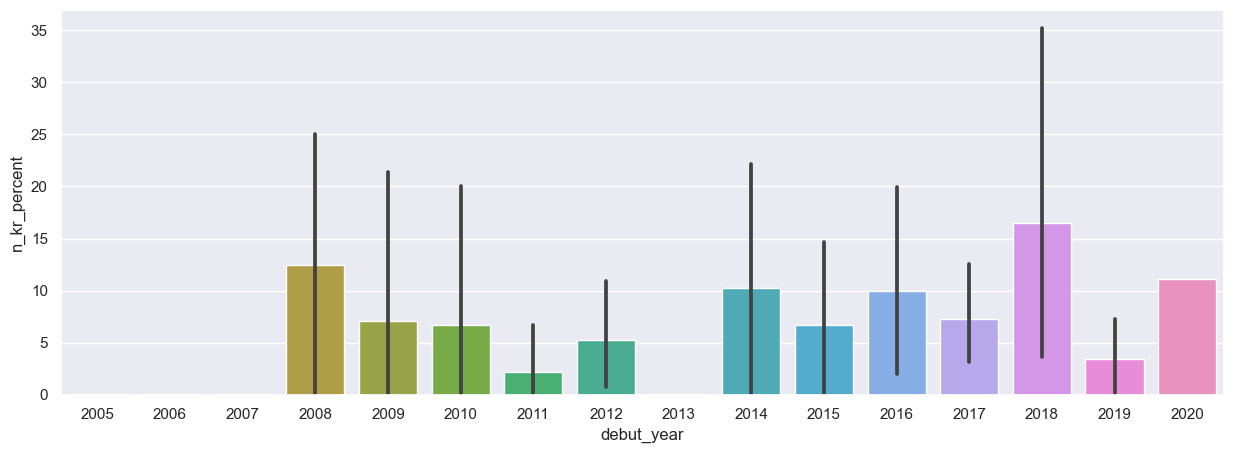

In [11]:
sns.barplot(data=tmp.sort_values('debut_year'), x='debut_year', y='n_kr_percent')

<AxesSubplot:xlabel='debut_year', ylabel='n_kr_percent'>

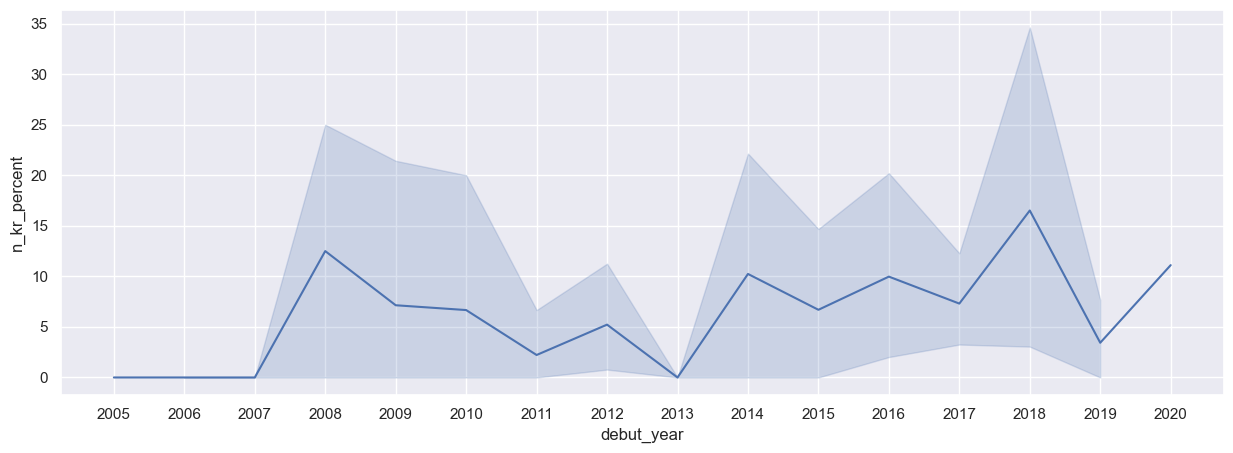

In [12]:
sns.lineplot(data=tmp.sort_values('debut_year'), x='debut_year', y='n_kr_percent')

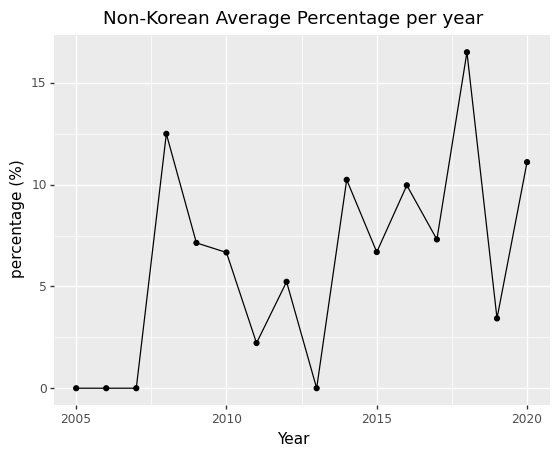

<ggplot: (116031594490)>

In [13]:
from plotnine import *

ggplot(b, aes('debut_year', 'n_kr_percent')) + geom_point() + geom_line(aes(group = 1)) + \
ggtitle('Non-Korean Average Percentage per year') + xlab('Year') + ylab('percentage (%)')

### • The average number of members per group

In [14]:
kpop_groups.head()

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active,gender,debut_year
0,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes,Male,2012
1,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes,Male,2017
2,1the9,NaN,원더나인,2019-02-09,MBK,9,9,NaN,Yes,Male,2019
3,24K,NaN,투포케이,2012-09-06,Choeun,8,6,24U,Yes,Male,2012
4,2AM,NaN,투에이엠,2008-06-21,"JYP, Big Hit",4,4,I Am,No,Male,2008


In [15]:
c = kpop_groups[['Members', 'gender', 'debut_year']].groupby(['debut_year', 'gender']).mean().reset_index()
c.Members = round(c.Members, 2)
c.columns = ['debut_year', 'gender', 'avg_Members']
c.debut_year = c.debut_year.astype(int)

[Text(0.5, 1.0, 'Average Member Amount')]

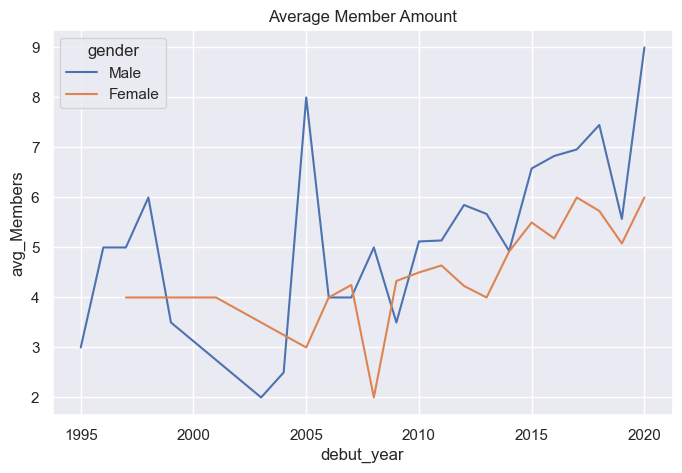

In [16]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.lineplot(data=c, x='debut_year', y='avg_Members', hue='gender').set(title='Average Member Amount')

[Text(0.5, 1.0, 'Boy groups')]

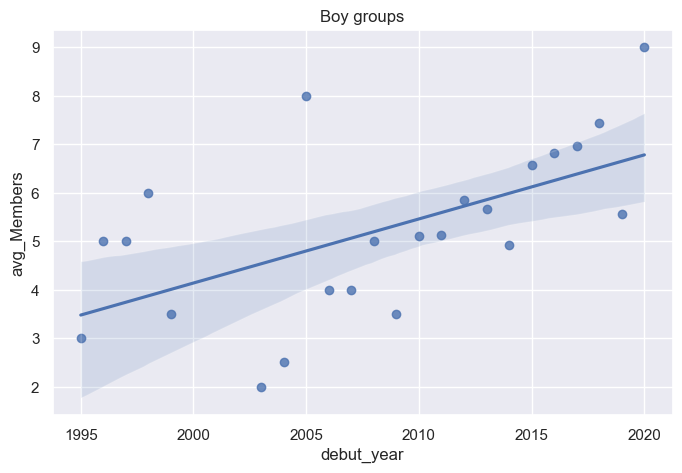

In [17]:
c_boy = c[c.gender == 'Male']
sns.regplot(data=c_boy, x='debut_year', y='avg_Members').set(title='Boy groups')

[Text(0.5, 1.0, 'Girl groups')]

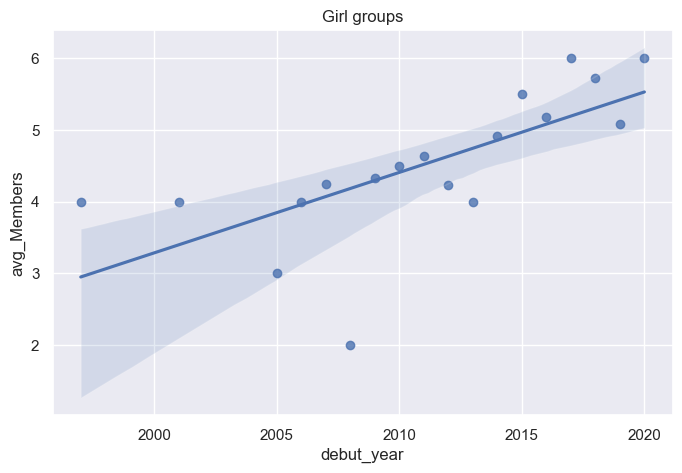

In [18]:
c_girl = c[c.gender == 'Female']
sns.regplot(data=c_girl, x='debut_year', y='avg_Members').set(title='Girl groups')

### • The average age of groups when they debuted

In [19]:
id = idols.copy()
id['Birthday'] = 0
for i in range(len(id)):
    id['Birthday'][i] = datetime.strptime(id['Date of Birth'][i], '%Y-%m-%d')

In [20]:
kg = kpop_groups.copy()
kg['debut_date'] = 0
for i in range(len(kg)):
    kg['debut_date'][i] = datetime.strptime(kg['Debut'][i], '%Y-%m-%d')
kg = kg[['Name', 'debut_date']]
kg.columns = ['Group', 'debut_date']

In [21]:
id.head()

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,Birthday
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M,1996-12-31 00:00:00
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M,1992-08-28 00:00:00
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F,1999-10-25 00:00:00
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F,1999-09-27 00:00:00
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F,2001-02-21 00:00:00


In [22]:
kg

,Group,debut_date
0,100%,2012-09-18 00:00:00
1,14U,2017-04-17 00:00:00
2,1the9,2019-02-09 00:00:00
3,24K,2012-09-06 00:00:00
4,2AM,2008-06-21 00:00:00
...,...,...
294,We Girls,2018-08-31 00:00:00
295,Weki Meki,2017-08-08 00:00:00
296,WJSN,2016-02-25 00:00:00
297,Wonder Girls,2007-02-13 00:00:00


In [23]:
res = id[['Stage Name', 'Group', 'Birthday']].merge(kg, on='Group')
res['debut_age'] = round((res['debut_date'] - res['Birthday']).dt.days / 365, 1)

In [24]:
ans = res[['Group', 'debut_age']].groupby(['Group']).mean().reset_index()
ans = ans.merge(kg, on='Group')
ans['debut_year'] = 0
for i in range(len(ans)):
    ans['debut_year'][i] = ans['debut_date'][i].year

In [25]:
output = ans.groupby(['debut_year']).mean().reset_index()
output

,debut_year,debut_age
0,2005,20.040000
1,2006,20.247500
2,2007,16.734444
3,2008,18.296667
4,2009,19.551905
5,2010,19.569714
6,2011,18.790185
7,2012,19.909067
8,2013,20.134226
9,2014,20.025863


<AxesSubplot:xlabel='debut_year', ylabel='debut_age'>

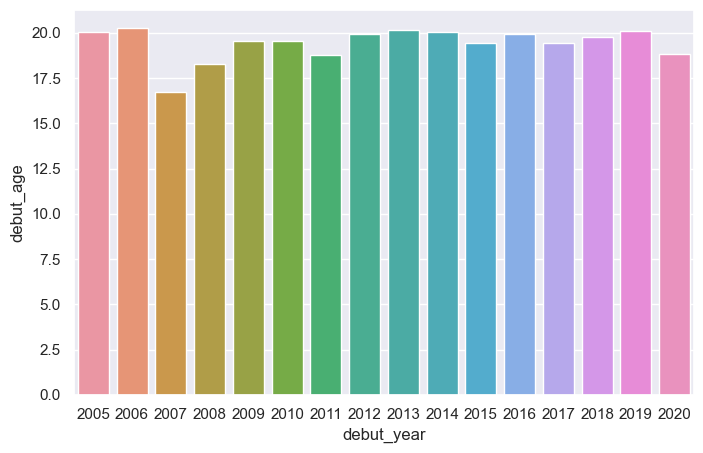

In [26]:
sns.barplot(data=output, x='debut_year', y='debut_age')

<AxesSubplot:xlabel='debut_year', ylabel='debut_age'>

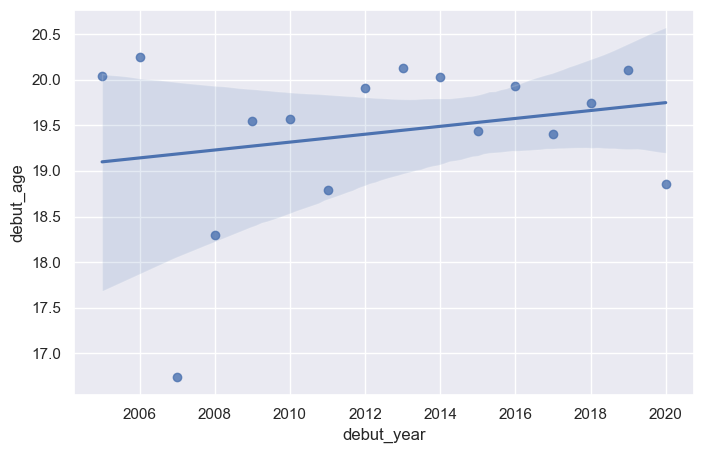

In [27]:
sns.regplot(data=output, x='debut_year', y='debut_age')

## 2. How’s the growth of K-pop music videos?

### • The number of released music videos per year for group versus solo artist

In [28]:
mv.head()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release,video_seconds,real_id,viewCount,likeCount,commentCount
0,2020-05-22,Agust D,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,269,qGjAWJ2zWWI,400055012,14169804,1361748
1,2020-05-21,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,186,BJD0arHF_5c,1164316,53308,2757
2,2020-05-21,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major,221,vVTo8p72FxQ,7492213,81482,3994
3,2020-05-20,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,225,aE6curPGQRY,2645267,42965,3526
4,2020-05-20,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,201,29ycT6fA-Rs,16993641,652327,32200


In [29]:
mv['year'] = 0
for i in range(len(mv)):
    mv.year[i] = int(mv.Date[i][:4])

In [30]:
mv['is_group'] = mv['Type'].apply(lambda x: 'No' if x == 'Boy Solo' or x == 'Girl Solo' else 'Yes')
mv['gender'] = mv['Type'].apply(lambda x: 'Male' if x == 'Boy' or x == 'Boy Solo' else ('Female' if x == 'Girl' or x == 'Girl Solo' else 'Mixed'))

In [31]:
mv.head()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release,video_seconds,real_id,viewCount,likeCount,commentCount,year,is_group,gender
0,2020-05-22,Agust D,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,269,qGjAWJ2zWWI,400055012,14169804,1361748,2020,No,Male
1,2020-05-21,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,186,BJD0arHF_5c,1164316,53308,2757,2020,No,Female
2,2020-05-21,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major,221,vVTo8p72FxQ,7492213,81482,3994,2020,Yes,Male
3,2020-05-20,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,225,aE6curPGQRY,2645267,42965,3526,2020,No,Female
4,2020-05-20,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,201,29ycT6fA-Rs,16993641,652327,32200,2020,No,Male


In [32]:
tmp = mv[['Artist', 'year', 'is_group', 'gender']]

In [33]:
tmp

,Artist,year,is_group,gender
0,Agust D,2020,No,Male
1,Yubin,2020,No,Female
2,OnlyOneOf,2020,Yes,Male
3,Ryu Sujeong,2020,No,Female
4,Crush,2020,No,Male
...,...,...,...,...
3760,Seo Taiji and Boys,1994,Yes,Male
3761,Seo Taiji and Boys,1993,Yes,Male
3762,Seo Taiji and Boys,1993,Yes,Male
3763,Seo Taiji and Boys,1992,Yes,Male


In [34]:
out = tmp[['Artist', 'year', 'is_group']].groupby(['year', 'is_group']).count().reset_index()
out.columns = ['year', 'is_group', 'count']
out.is_group = out.is_group.apply(lambda x: 'Group' if x == 'Yes' else 'Solo')

In [35]:
out.head()

,year,is_group,count
0,1992,Group,2
1,1993,Group,2
2,1994,Group,2
3,1995,Group,5
4,1996,Group,3


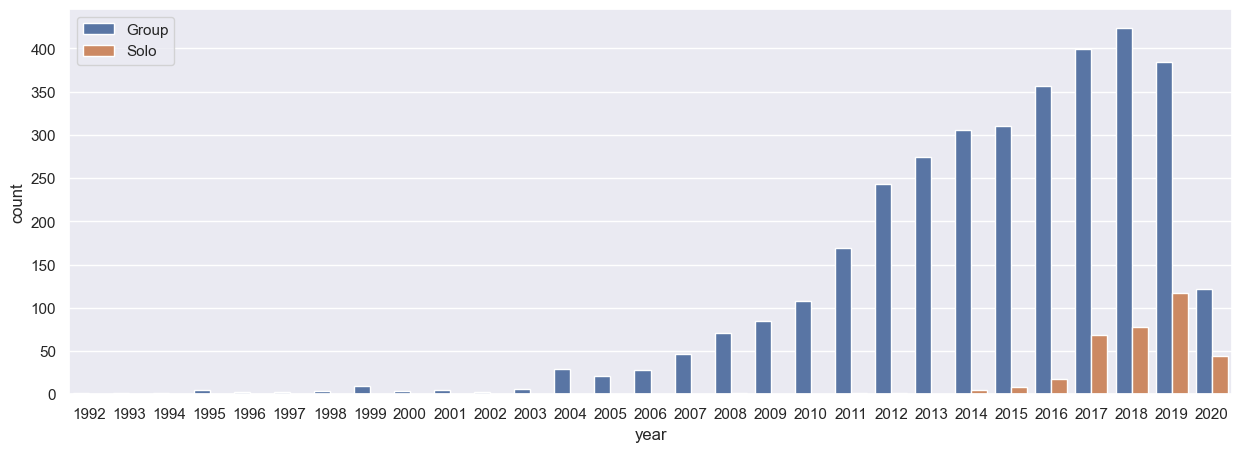

In [36]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.barplot(data=out, x='year', y='count', hue='is_group').set(title='')
plt.legend(loc='upper left')

### • The number of released music videos per year for artist type (Male, Female, or Mixed)

In [37]:
out = tmp[['Artist', 'year', 'gender']].groupby(['year', 'gender']).count().reset_index()
out.columns = ['year', 'gender', 'count']

<AxesSubplot:xlabel='year', ylabel='count'>

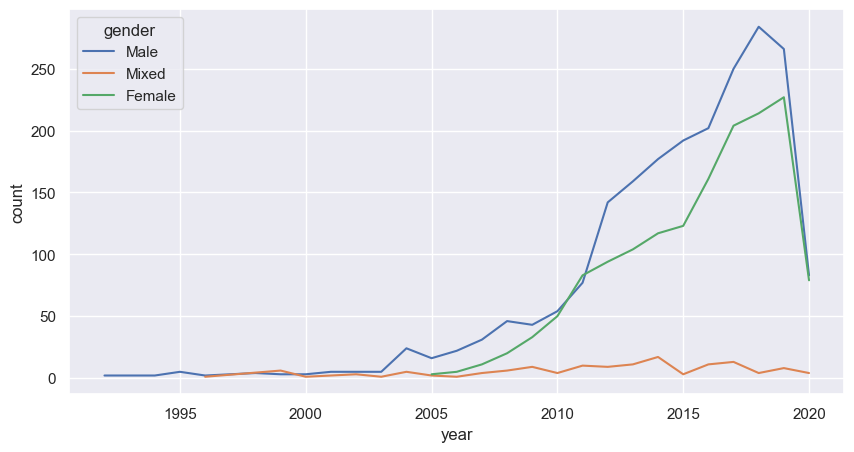

In [38]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.lineplot(data=out, x='year', y='count', hue='gender')

### • The average total views per music video for the major and the minor album

In [39]:
deal = mv[['Song Name', 'Release', 'viewCount', 'year', 'is_group', 'gender']]

In [40]:
deal.head()

,Song Name,Release,viewCount,year,is_group,gender
0,Daechwita,Major,400055012,2020,No,Male
1,yaya (Me Time),Major,1164316,2020,No,Female
2,Angel (prod. GRAY),Major,7492213,2020,Yes,Male
3,Tiger Eyes,Major,2645267,2020,No,Female
4,Mayday feat. Joy (Red Velvet),Major,16993641,2020,No,Male


In [41]:
tmp = deal.groupby(['year', 'Release']).mean().reset_index()
tmp

,year,Release,viewCount
0,1992,Major,2.365287e+06
1,1992,Minor,2.299170e+05
2,1993,Major,1.289910e+06
3,1993,Minor,1.232180e+05
4,1994,Major,1.037467e+06
...,...,...,...
113,2020,Japanese,6.510216e+06
114,2020,Major,3.217714e+07
115,2020,Minor,4.106623e+07
116,2020,OST,7.199950e+06


In [42]:
tmp = pd.concat([tmp[tmp.Release == 'Major'], tmp[tmp.Release == 'Minor']]).sort_values('year')

<AxesSubplot:xlabel='year', ylabel='viewCount'>

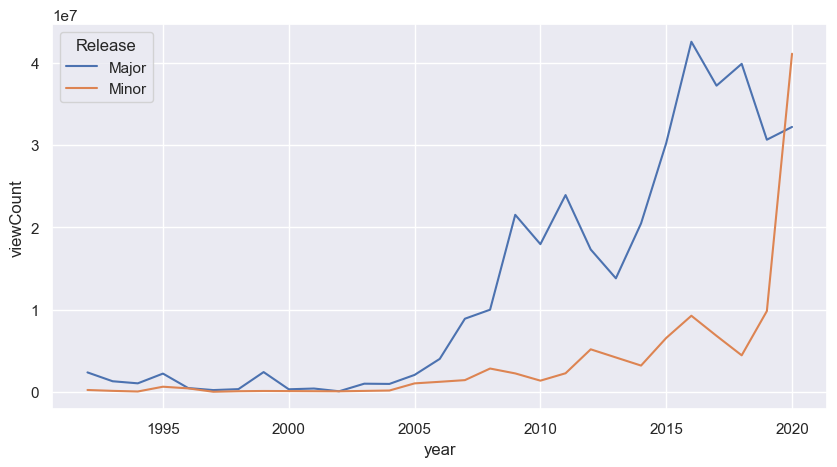

In [43]:
sns.lineplot(data=tmp, x='year', y='viewCount', hue='Release')

### • The average video length during the time section

In [44]:
mv.head()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release,video_seconds,real_id,viewCount,likeCount,commentCount,year,is_group,gender
0,2020-05-22,Agust D,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,269,qGjAWJ2zWWI,400055012,14169804,1361748,2020,No,Male
1,2020-05-21,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,186,BJD0arHF_5c,1164316,53308,2757,2020,No,Female
2,2020-05-21,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major,221,vVTo8p72FxQ,7492213,81482,3994,2020,Yes,Male
3,2020-05-20,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,225,aE6curPGQRY,2645267,42965,3526,2020,No,Female
4,2020-05-20,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,201,29ycT6fA-Rs,16993641,652327,32200,2020,No,Male


In [45]:
tmp = mv.copy()
for i in range(len(tmp)):
    tmp.Date[i] = datetime.strptime(tmp.Date[i], '%Y-%m-%d')

In [46]:
tmp['season'] = tmp.Date.apply(lambda x: 'Spring' if x.month in [3, 4, 5]
                                   else ('Summer' if x.month in [6, 7, 8]
                                   else ('Fall' if x.month in [9, 10, 11]
                                   else 'Winter')))

In [47]:
tmp.head()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release,video_seconds,real_id,viewCount,likeCount,commentCount,year,is_group,gender,season
0,2020-05-22 00:00:00,Agust D,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,269,qGjAWJ2zWWI,400055012,14169804,1361748,2020,No,Male,Spring
1,2020-05-21 00:00:00,Yubin,yaya (Me Time),넵넵,NaN,https://youtu.be/BJD0arHF_5c,Girl Solo,Major,186,BJD0arHF_5c,1164316,53308,2757,2020,No,Female,Spring
2,2020-05-21 00:00:00,OnlyOneOf,Angel (prod. GRAY),NaN,NaN,https://youtu.be/vVTo8p72FxQ,Boy,Major,221,vVTo8p72FxQ,7492213,81482,3994,2020,Yes,Male,Spring
3,2020-05-20 00:00:00,Ryu Sujeong,Tiger Eyes,NaN,NaN,https://youtu.be/aE6curPGQRY,Girl Solo,Major,225,aE6curPGQRY,2645267,42965,3526,2020,No,Female,Spring
4,2020-05-20 00:00:00,Crush,Mayday feat. Joy (Red Velvet),자나깨나,NaN,https://youtu.be/29ycT6fA-Rs,Boy Solo,Major,201,29ycT6fA-Rs,16993641,652327,32200,2020,No,Male,Spring


In [48]:
output = tmp[['video_seconds', 'year', 'season']].groupby(['year', 'season']).mean().reset_index()
output

,year,season,video_seconds
0,1992,Spring,215.000000
1,1993,Summer,285.000000
2,1994,Summer,209.500000
3,1995,Fall,280.800000
4,1996,Fall,241.666667
...,...,...,...
82,2019,Spring,222.821429
83,2019,Summer,213.028369
84,2019,Winter,222.462366
85,2020,Spring,215.303371


<AxesSubplot:xlabel='year', ylabel='video_seconds'>

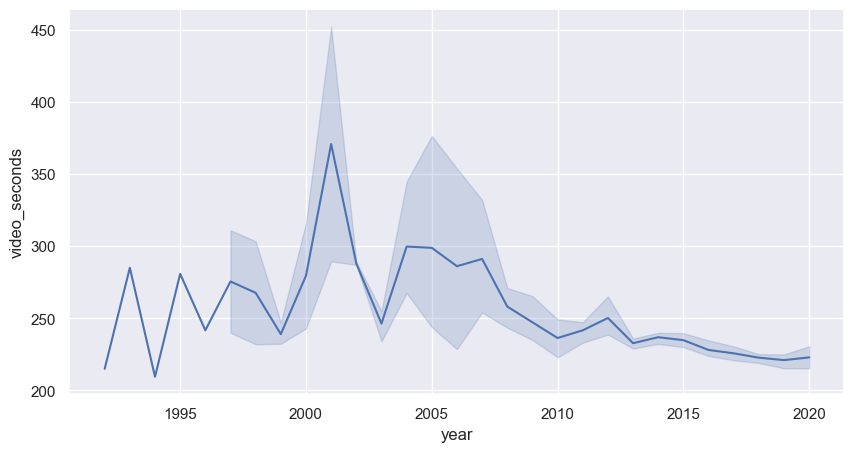

In [49]:
sns.lineplot(data=output, x='year', y='video_seconds')

## 3. What’s the distribution of famous K-pop artists?

groups that have at least one music videos over 100,000,000

### • The comparison between artists in groups or solo, and the gender of the group

In [50]:
target = mv[mv.viewCount >= 100000000].reset_index().drop(columns='index')

In [51]:
for i in range(len(target)):
    if target.Artist[i] == 'BLACKPINK': target.Artist[i] = 'Blackpink'

In [52]:
tmp = target[['Artist', 'Type', 'gender', 'viewCount', 'likeCount', 'commentCount']]
tmp = tmp.groupby(['Artist', 'Type', 'gender']).mean().reset_index()
tmp['is_group'] = tmp.Type.apply(lambda x: 'Solo' if x == 'Girl Solo' or x == 'Boy Solo' else 'Group')

In [53]:
groupby_df = tmp[['gender', 'is_group', 'viewCount', 'likeCount', 'commentCount']]\
    .groupby(['is_group', 'gender']).mean()
groupby_df

viewCount     likeCount   commentCount
is_group gender                                           
Group    Female  2.347325e+08  2.503020e+06  201215.979545
         Male    1.968980e+08  3.046022e+06  320468.326166
         Mixed   1.204988e+08  9.342520e+05   49444.000000
Solo     Female  3.108035e+08  4.837777e+06  454199.350000
         Male    2.511902e+08  6.711617e+06  571822.250000

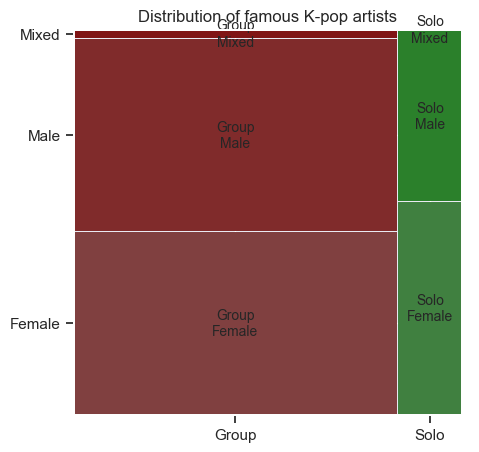

In [54]:
from statsmodels.graphics.mosaicplot import mosaic
sns.set(rc={'figure.figsize':(5, 5)})
t = mosaic(tmp, ['is_group','gender'],title='Distribution of famous K-pop artists')

### • The number of solo artists that belongs to a group

In [55]:
solo_list = target[target.is_group == 'No'].Artist.drop_duplicates().values
solo_list

array(['Agust D', 'IU', 'j-hope', 'Somi', 'Jennie', 'Sunmi', 'G-Dragon',
       'PSY', 'Taeyeon'], dtype=object)

In [56]:
solo_list[0] = 'Suga'
solo_list[2] = 'J-Hope'
solo_list

array(['Suga', 'IU', 'J-Hope', 'Somi', 'Jennie', 'Sunmi', 'G-Dragon',
       'PSY', 'Taeyeon'], dtype=object)

In [57]:
solo_df = []
for i in solo_list:
    solo_df.append(idols[idols['Stage Name'] == i])
res = pd.concat(solo_df, ignore_index=True)
res['from_group'] = res.Group.apply(lambda x: 'No' if pd.isna(x) else 'Yes')
res

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender,from_group
0,Suga,Min Yoongi,민윤기,슈가,1993-03-09,BTS,South Korea,Daegu,NaN,M,Yes
1,IU,Lee Jieun,이지은,아이유,1993-05-16,NaN,South Korea,Seoul,NaN,F,No
2,J-Hope,Jung Hoseok,정호석,제이홉,1994-02-18,BTS,South Korea,Gwangju,NaN,M,Yes
3,Somi,Jeon Somi,전소미,소미,2001-03-09,NaN,South Korea,Ontario,NaN,F,No
4,Jennie,Kim Jennie,김제니,제니,1996-01-16,BLACKPINK,South Korea,Anyang,NaN,F,Yes
5,Sunmi,Lee Sunmi,이선미,선미,1992-05-02,Wonder Girls,South Korea,Iksan,NaN,F,Yes
6,G-Dragon,Kwon Jiyong,권지용,지드래곤,1988-08-18,BIGBANG,South Korea,Seoul,GD&TOP,M,Yes
7,PSY,Park Jaesang,박재상,싸이,1977-12-31,NaN,South Korea,Seoul,NaN,M,No
8,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,Jeonju,"TTS, Oh!GG",F,Yes


[Text(0.5, 1.0, 'Number of Solo K-pop Artist')]

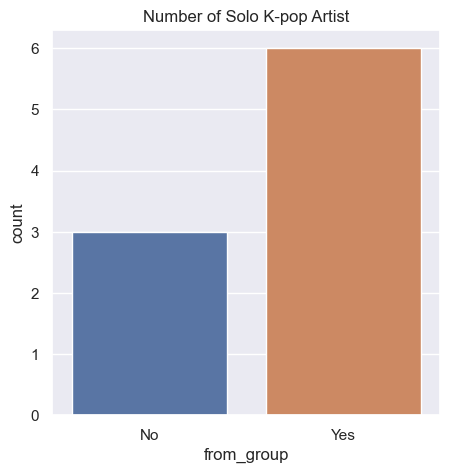

In [58]:
tmp = res[['Stage Name', 'from_group']].groupby(['from_group']).count().reset_index()
tmp.columns = ['from_group', 'count']
sns.set(rc={'figure.figsize':(5, 5)})
sns.barplot(tmp, x='from_group', y='count').set(title='Number of Solo K-pop Artist')

### • The highest likeCount, commentCount, and viewCount from these music videos

In [59]:
target.head()

,Date,Artist,Song Name,Korean Name,Director,Video,Type,Release,video_seconds,real_id,viewCount,likeCount,commentCount,year,is_group,gender
0,2020-05-22,Agust D,Daechwita,대취타,NaN,https://youtu.be/qGjAWJ2zWWI,Boy Solo,Major,269,qGjAWJ2zWWI,400055012,14169804,1361748,2020,No,Male
1,2020-05-06,IU,eight feat. SUGA,에잇,NaN,https://youtu.be/TgOu00Mf3kI,Girl Solo,Major,222,TgOu00Mf3kI,167046888,5791137,294841,2020,No,Female
2,2020-04-06,(G)I-DLE,Oh My God,오마이갓,Rigend Film,https://youtu.be/om3n2ni8luE,Girl,Major,201,om3n2ni8luE,188011719,3048921,209514,2020,Yes,Female
3,2020-03-09,ITZY,Wannabe,NaN,Naive,https://youtu.be/fE2h3lGlOsk,Girl,Major,219,fE2h3lGlOsk,477671694,6176236,321844,2020,Yes,Female
4,2020-03-05,BTS,Black Swan,NaN,NaN,https://youtu.be/0lapF4DQPKQ,Boy,Minor,218,0lapF4DQPKQ,434667305,12343964,1204060,2020,Yes,Male


In [60]:
target.Artist.value_counts().index

Index(['BTS', 'Twice', 'BIGBANG', 'Red Velvet', 'EXO', 'GOT7',
       'Girls' Generation', 'Blackpink', 'Super Junior', 'IU', 'Everglow',
       'Stray Kids', 'TXT', 'ITZY', '(G)I-DLE', 'SEVENTEEN', 'Momoland',
       'iKON', 'SISTAR', '2NE1', 'NCT U', 'PSY', 'SHINee', 'Mamamoo',
       'NCT 127', 'j-hope', 'GD X TAEYANG', 'As One', '4Minute',
       'Trouble Maker', 'EXID', 'High4, IU', 'f(x)', 'KARA', 'Beast',
       'SISTAR19', 'miss A', 'Agust D', 'MONSTA X', 'Exo', 'ATEEZ', 'SuperM',
       'X1', 'NCT Dream', 'Somi', 'Jennie', 'IZ*ONE', 'Taeyeon',
       'Girls' Generation-Oh!GG', 'Bolbbalgan4', 'Sunmi', 'Wanna One',
       'G-Dragon', 'WINNER', 'Wonder Girls'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, '(G)I-DLE'),
  Text(1, 0, '2NE1'),
  Text(2, 0, '4Minute'),
  Text(3, 0, 'ATEEZ'),
  Text(4, 0, 'Agust D'),
  Text(5, 0, 'As One'),
  Text(6, 0, 'BIGBANG'),
  Text(7, 0, 'BTS'),
  Text(8, 0, 'Beast'),
  Text(9, 0, 'Blackpink'),
  Text(10, 0, 'Bolbbalgan4'),
  Text(11, 0, 'EXID'),
  Text(12, 0, 'EXO'),
  Text(13, 0, 'Everglow'),
  Text(14, 0, 'Exo'),
  Text(15, 0, 'G-Dragon'),
  Text(16, 0, 'GD X TAEYANG'),
  Text(17, 0, 'GOT7'),
  Text(18, 0, "Girls' Generation"),
  Text(19, 0, "Girls' Generation-Oh!GG"),
  Text(20, 0, 'High4, IU'),
  Text(21, 0, 'ITZY'),
  Text(22, 0, 'IU'),
  Text(23, 0, 'IZ*ONE'),
  Text(24, 0, 'Jennie'),
  Text(25, 0, 'KARA'),
  Text(26, 0, 'MONSTA X'),
  Text(27, 0, 'Mamamoo'),
  Text(28, 0, 'Momoland'

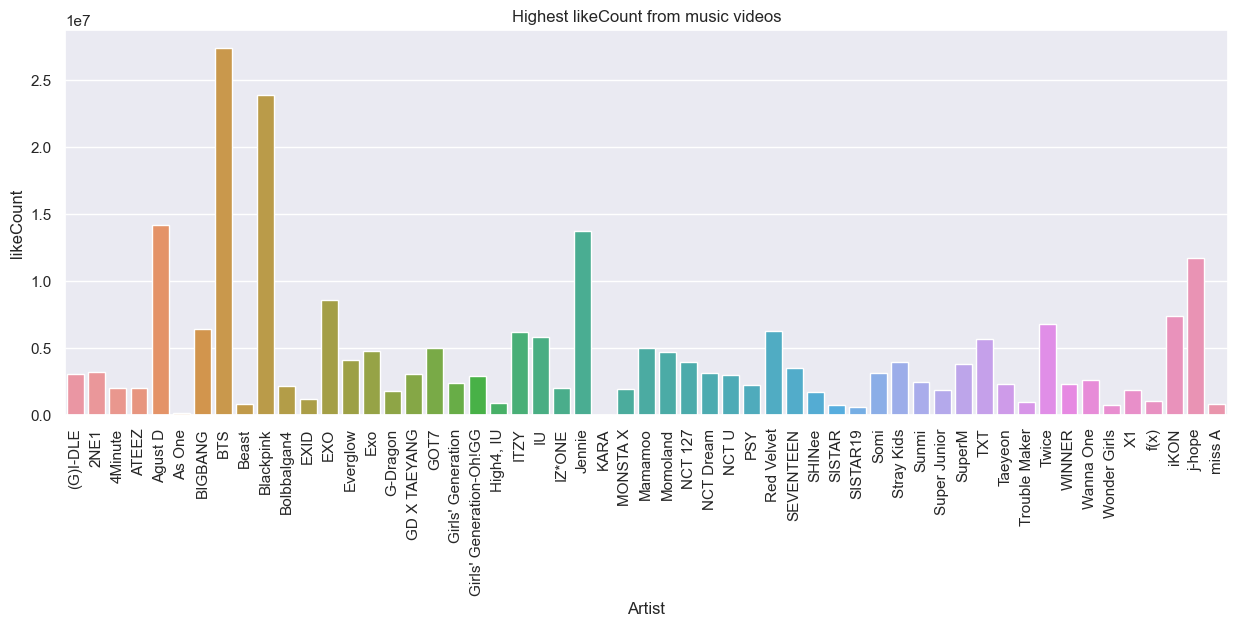

In [61]:
tmp = target[['Artist', 'likeCount']].groupby('Artist').max().reset_index()
sns.set(rc={'figure.figsize':(15, 5)})
fig = sns.barplot(tmp, x='Artist', y='likeCount').set(title='Highest likeCount from music videos')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, '(G)I-DLE'),
  Text(1, 0, '2NE1'),
  Text(2, 0, '4Minute'),
  Text(3, 0, 'ATEEZ'),
  Text(4, 0, 'Agust D'),
  Text(5, 0, 'As One'),
  Text(6, 0, 'BIGBANG'),
  Text(7, 0, 'BTS'),
  Text(8, 0, 'Beast'),
  Text(9, 0, 'Blackpink'),
  Text(10, 0, 'Bolbbalgan4'),
  Text(11, 0, 'EXID'),
  Text(12, 0, 'EXO'),
  Text(13, 0, 'Everglow'),
  Text(14, 0, 'Exo'),
  Text(15, 0, 'G-Dragon'),
  Text(16, 0, 'GD X TAEYANG'),
  Text(17, 0, 'GOT7'),
  Text(18, 0, "Girls' Generation"),
  Text(19, 0, "Girls' Generation-Oh!GG"),
  Text(20, 0, 'High4, IU'),
  Text(21, 0, 'ITZY'),
  Text(22, 0, 'IU'),
  Text(23, 0, 'IZ*ONE'),
  Text(24, 0, 'Jennie'),
  Text(25, 0, 'KARA'),
  Text(26, 0, 'MONSTA X'),
  Text(27, 0, 'Mamamoo'),
  Text(28, 0, 'Momoland'

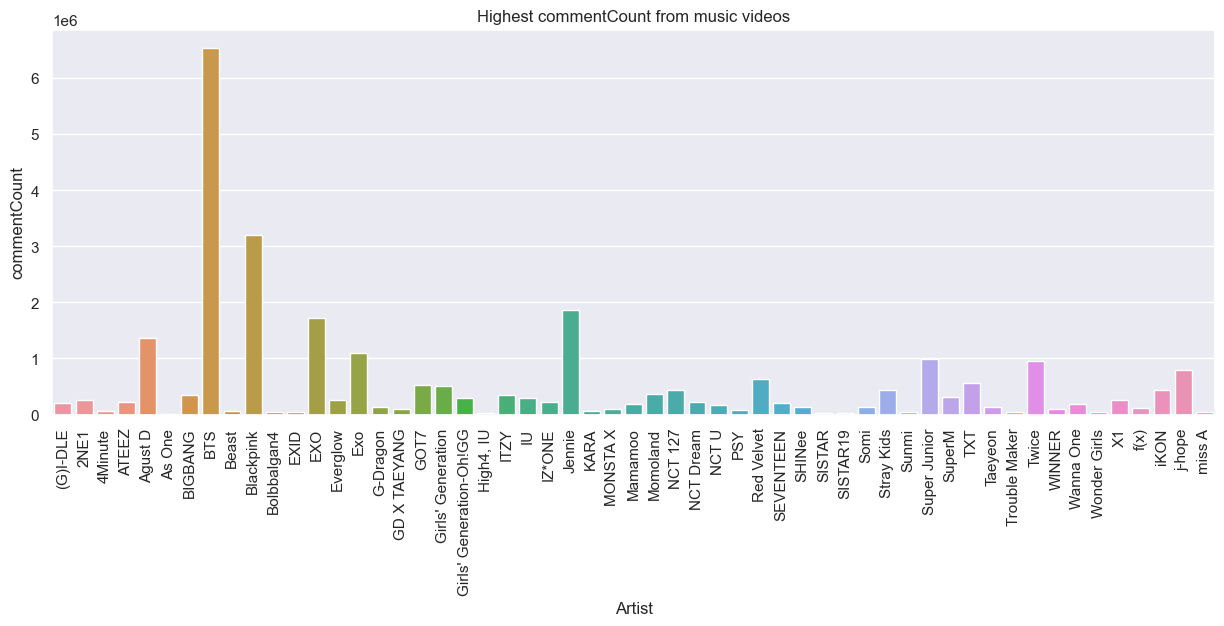

In [62]:
tmp = target[['Artist', 'commentCount']].groupby('Artist').max().reset_index()
sns.set(rc={'figure.figsize':(15, 5)})
fig = sns.barplot(tmp, x='Artist', y='commentCount').set(title='Highest commentCount from music videos')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),
 [Text(0, 0, '(G)I-DLE'),
  Text(1, 0, '2NE1'),
  Text(2, 0, '4Minute'),
  Text(3, 0, 'ATEEZ'),
  Text(4, 0, 'Agust D'),
  Text(5, 0, 'As One'),
  Text(6, 0, 'BIGBANG'),
  Text(7, 0, 'BTS'),
  Text(8, 0, 'Beast'),
  Text(9, 0, 'Blackpink'),
  Text(10, 0, 'Bolbbalgan4'),
  Text(11, 0, 'EXID'),
  Text(12, 0, 'EXO'),
  Text(13, 0, 'Everglow'),
  Text(14, 0, 'Exo'),
  Text(15, 0, 'G-Dragon'),
  Text(16, 0, 'GD X TAEYANG'),
  Text(17, 0, 'GOT7'),
  Text(18, 0, "Girls' Generation"),
  Text(19, 0, "Girls' Generation-Oh!GG"),
  Text(20, 0, 'High4, IU'),
  Text(21, 0, 'ITZY'),
  Text(22, 0, 'IU'),
  Text(23, 0, 'IZ*ONE'),
  Text(24, 0, 'Jennie'),
  Text(25, 0, 'KARA'),
  Text(26, 0, 'MONSTA X'),
  Text(27, 0, 'Mamamoo'),
  Text(28, 0, 'Momoland'

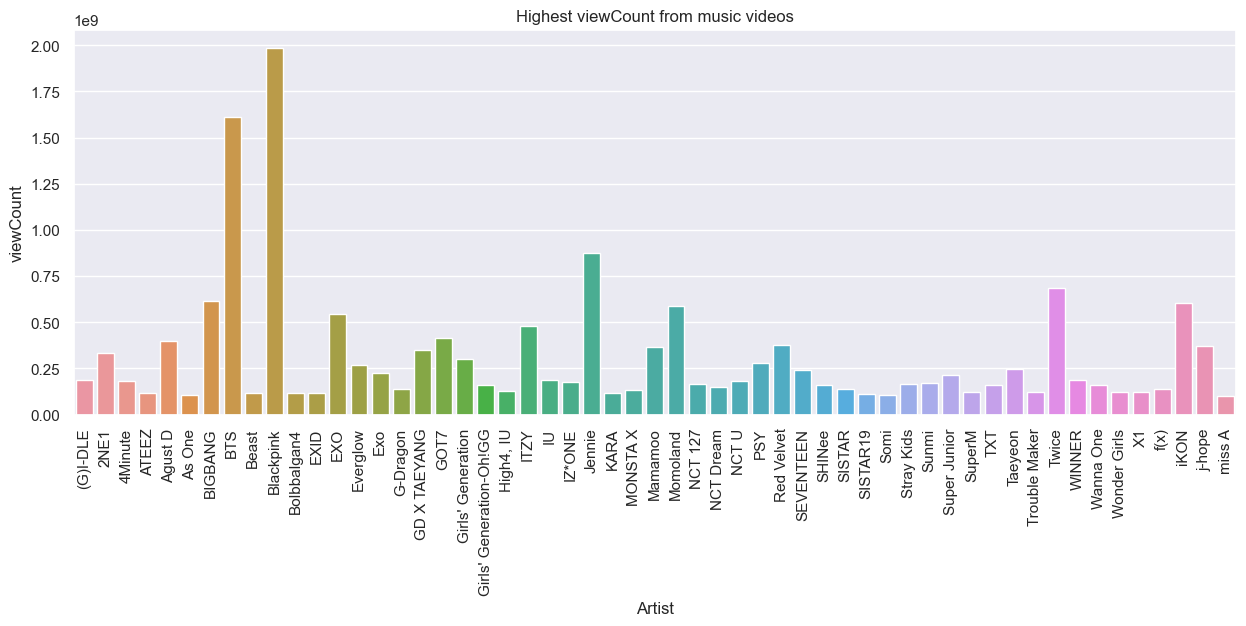

In [63]:
tmp = target[['Artist', 'viewCount']].groupby('Artist').max().reset_index()
sns.set(rc={'figure.figsize':(15, 5)})
fig = sns.barplot(tmp, x='Artist', y='viewCount').set(title='Highest viewCount from music videos')
plt.xticks(rotation=90)